## BLUES VE KLASİK MÜZİK TÜRLERİ İÇİN BINARY CLASSIFICATION UYGULANMASI

* Öncelikle kullanılacak kütüphaneleri projemize ekleyelim.

In [1]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

* Daha önceden oluşturduğumuz veri setinden sadece metal ve klasik müzikler için olan veriyi alacak şekilde kodumuzu yazalım.
* Ayrıca burada sadece ilk 9 feature ile bir çalışma gerçekleştireceğiz.
* Buradaki amaç ikinci çalışm ile birlikte MFCC öz niteliklerinin başarı oranına etkisini incelemektir.

In [18]:
data_set=pandas.read_csv('data_set.csv',index_col=False,usecols=(1,2,3,4,5,6,7,8,9,36))
data_set=data_set[:200]
GENRES=["Blues","Classical"]
print(data_set)

number_of_rows,number_of_cols = data_set.shape

       stdZCR  meanSpecCentroid  stdSpecCentroid  meanSpecContrast  \
0   -0.784343         -0.381408        -0.691147         -0.187280   
1   -0.726759         -0.559681        -0.463433         -0.139501   
2   -0.556617         -0.500726        -0.520669         -0.352145   
3   -0.920130         -0.872967        -0.743929         -0.635685   
4   -0.400993         -0.236112        -0.243814         -0.310327   
5   -0.901320         -0.711479        -0.733247         -0.578599   
6   -0.667086         -0.497414        -0.341626         -0.523793   
7   -0.886928         -0.552424        -0.731196         -0.357423   
8   -0.688393         -0.386585        -0.516244         -0.156668   
9   -0.676589         -0.302418        -0.461719         -0.130890   
10  -0.916381         -0.522665        -0.735049         -0.561352   
11  -0.713491         -0.603437        -0.367089         -0.342741   
12  -0.693245         -0.541463        -0.596793         -0.393664   
13  -0.746005       

* Veri setimizi iki müzik türü için de aynı sayıda örnek içerecek şekilde %70 öğrenme, %30 test olarak ayıralım.
* Ayırdığımız iki veri seti için de öz niteliklerin ve sınıf sütunun olduğu iki ayrı dizi oluşturalım.

In [11]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.3,random_state=1,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))


Training data size: (140, 10)
Test data size: (60, 10)


* Kullanıma hazır veri setlerimizi öğrenme ve test için kullanalım.
 - **Uygulanan Algoritmalar:**
   - K-En Yakın Komşu
   - Rastgele Orman
   - Destek Vektör Makinesi
   - Yapay Sinir Ağları
   
** Not:** Bu çalışmada algoritmalar için herhangi bir optimizasyon işlemi yapılmamıştır.

* KNN algoritmasının uygulanması ve ortalama başarı sonucunun ekrana yazdırılması

In [12]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)

print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))

Training Score: 0.871
Test score: 0.817


* Random Forest algoritmasının uygulanması ve ortalama başarı sonucunun ekrana yazdırılması

In [13]:
forest=RandomForestClassifier(random_state=1)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

Training Score: 0.993
Test score: 0.850


* SVM algoritmasının uygulanması ve ortalama başarı sonucunun ekrana yazdırılması

In [14]:
svm=SVC()
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

Training Score: 0.836
Test score: 0.817


* Neural Network algoritmasının uygulanması ve ortalama başarı sonucunun ekrana yazdırılması

In [15]:
neural=MLPClassifier(max_iter=1000,random_state=1,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))


Training Score: 0.986
Test score: 0.850


* Modellerin başarım oranını daha iyi anlamlandırabilmek ve görsellik katılması adına bir fonksiyon yazalım.

In [16]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

* Önce test verisindeki gerçek sınıfları daha sonra da modelimizin ürettiği sonuçları ekrana yazdıralım.
* Sonraki adımda ise daha önceden yazdığımız fonksiyon ile bir confusion matrix oluşturalım.

**Not:** Sonuçlar ve oluşturulan confusion matrix, bu çalışmadaki en iyi sonuç veren model baz alınarak elde edilmiştir.

---------------PERFORMANCE ANALYSIS FOR THE BEST MODEL FOR THIS WORK----------------

Real Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl'
 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']

Predicted Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'B' 'Cl' 'B' 'Cl'
 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']


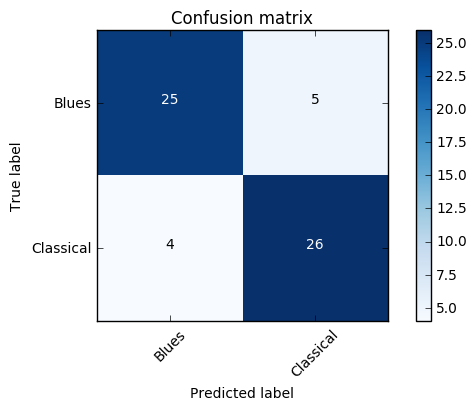

In [19]:
true=test_y
pred=forest.predict(test_x)

print("---------------PERFORMANCE ANALYSIS FOR THE BEST MODEL FOR THIS WORK----------------\n")

print("Real Test dataset labels: \n{}\n".format(true))
print("Predicted Test dataset labels: \n{}".format(pred))

cnf_matrix=sklearn.metrics.confusion_matrix(test_y,pred)
plt.figure()
a=plot_confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')